### Importación de datos



In [24]:
import pandas as pd
import matplotlib.pyplot as plt


# Cargar los datos de tiendas
url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

# Leer los archivos CSV
tienda1 = pd.read_csv(url1)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

# Agregar columna distintiva de tienda a cada DataFrame
tienda1['tienda'] = 'tienda1'
tienda2['tienda'] = 'tienda2'
tienda3['tienda'] = 'tienda3'
tienda4['tienda'] = 'tienda4'

# Combinar los archivos en un solo DataFrame
Consolidado_tiendas = pd.concat([tienda1, tienda2, tienda3, tienda4], ignore_index=True)

# Mostrar las primeras filas del DataFrame consolidado
Consolidado_tiendas.head()



,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,tienda
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175,tienda1
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359,tienda1
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444,tienda1
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250,tienda1
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359,tienda1


In [25]:
# información de los datos
print(f'Total de registros: {len(Consolidado_tiendas)}')
print(f'Total de ventas por tienda:')
print(Consolidado_tiendas['tienda'].value_counts())


Total de registros: 9435
Total de ventas por tienda:
tienda
tienda1    2359
tienda2    2359
tienda3    2359
tienda4    2358
Name: count, dtype: int64


#0. Análisis exploratorio


In [26]:
# =============================================================================
# ANÁLISIS EXPLORATORIO INICIAL - ESTRUCTURA DE DATOS
# =============================================================================
print("=" * 70)
print("🔍 ANÁLISIS EXPLORATORIO - ESTRUCTURA DEL DATASET CONSOLIDADO")
print("=" * 70)

# 1. INFORMACIÓN BÁSICA DEL DATASET
print("\n1. 📊 INFORMACIÓN ESTRUCTURAL:")
print(f"   • Dimensiones: {Consolidado_tiendas.shape[0]} filas x {Consolidado_tiendas.shape[1]} columnas")
print(f"   • Memoria utilizada: {Consolidado_tiendas.memory_usage(deep=True).sum() / 1024 / 1024:.2f} MB")

# 2. TIPOS DE DATOS Y VALORES NULOS
print("\n2. 📝 TIPOS DE DATOS Y COMPLETITUD:")
print(Consolidado_tiendas.info())

# 3. ESTADÍSTICAS DESCRIPTIVAS
print("\n3. 📈 ESTADÍSTICAS DESCRIPTIVAS - COLUMNAS NUMÉRICAS:")
print(Consolidado_tiendas.describe())

# 4. ANÁLISIS POR COLUMNA
print("\n4. 🗂️ ANÁLISIS POR COLUMNA:")
for columna in Consolidado_tiendas.columns:
    print(f"\n   📋 {columna}:")
    print(f"      • Tipo: {Consolidado_tiendas[columna].dtype}")
    print(f"      • Valores únicos: {Consolidado_tiendas[columna].nunique()}")
    print(f"      • Valores nulos: {Consolidado_tiendas[columna].isnull().sum()} ({Consolidado_tiendas[columna].isnull().sum()/len(Consolidado_tiendas)*100:.1f}%)")

    if Consolidado_tiendas[columna].nunique() <= 10:
        print(f"      • Valores: {Consolidado_tiendas[columna].value_counts().to_dict()}")

🔍 ANÁLISIS EXPLORATORIO - ESTRUCTURA DEL DATASET CONSOLIDADO

1. 📊 INFORMACIÓN ESTRUCTURAL:
   • Dimensiones: 9435 filas x 13 columnas
   • Memoria utilizada: 4.93 MB

2. 📝 TIPOS DE DATOS Y COMPLETITUD:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9435 entries, 0 to 9434
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Producto                9435 non-null   object 
 1   Categoría del Producto  9435 non-null   object 
 2   Precio                  9435 non-null   float64
 3   Costo de envío          9435 non-null   float64
 4   Fecha de Compra         9435 non-null   object 
 5   Vendedor                9435 non-null   object 
 6   Lugar de Compra         9435 non-null   object 
 7   Calificación            9435 non-null   int64  
 8   Método de pago          9435 non-null   object 
 9   Cantidad de cuotas      9435 non-null   int64  
 10  lat                     9435 non-null   float64
 

#1. Análisis de facturación



In [27]:
# =============================================================================
# ANÁLISIS DE FACTURACIÓN - INGRESO TOTAL POR TIENDA
# =============================================================================
print("=" * 60)
print("💰 ANÁLISIS DE FACTURACIÓN - INGRESO TOTAL POR TIENDA")
print("=" * 60)

# 1. CALCULAR FACTURACIÓN TOTAL POR TIENDA
facturacion_por_tienda = Consolidado_tiendas.groupby('tienda')['Precio'].sum()

print("\n📊 FACTURACIÓN TOTAL POR TIENDA:")
print("-" * 40)
for tienda, facturacion in facturacion_por_tienda.items():
    print(f"   {tienda}: ${facturacion:,.2f}")

# 2. ESTADÍSTICAS DE LA FACTURACIÓN
print("\n📈 ESTADÍSTICAS DE FACTURACIÓN:")
print("-" * 30)
print(f"   • Facturación total general: ${facturacion_por_tienda.sum():,.2f}")
print(f"   • Facturación promedio por tienda: ${facturacion_por_tienda.mean():,.2f}")
print(f"   • Tienda con mayor facturación: {facturacion_por_tienda.idxmax()} (${facturacion_por_tienda.max():,.2f})")
print(f"   • Tienda con menor facturación: {facturacion_por_tienda.idxmin()} (${facturacion_por_tienda.min():,.2f})")
print(f"   • Diferencia entre mayor y menor: ${facturacion_por_tienda.max() - facturacion_por_tienda.min():,.2f}")

# 3. DISTRIBUCIÓN PORCENTUAL
print("\n📋 DISTRIBUCIÓN PORCENTUAL:")
print("-" * 30)
for tienda, facturacion in facturacion_por_tienda.items():
    porcentaje = (facturacion / facturacion_por_tienda.sum()) * 100
    print(f"   {tienda}: {porcentaje:.1f}%")

# 4. CREAR VARIABLE GLOBAL
FACTURACION_TIENDAS = facturacion_por_tienda

# 5. RESUMEN EJECUTIVO
print("\n🎯 RESUMEN EJECUTIVO - FACTURACIÓN:")
print("-" * 35)
print(f"   Candidata a evaluar para venta: {facturacion_por_tienda.idxmin()}")
print(f"   Justificación: Menor facturación total")

💰 ANÁLISIS DE FACTURACIÓN - INGRESO TOTAL POR TIENDA

📊 FACTURACIÓN TOTAL POR TIENDA:
----------------------------------------
   tienda1: $1,150,880,400.00
   tienda2: $1,116,343,500.00
   tienda3: $1,098,019,600.00
   tienda4: $1,038,375,700.00

📈 ESTADÍSTICAS DE FACTURACIÓN:
------------------------------
   • Facturación total general: $4,403,619,200.00
   • Facturación promedio por tienda: $1,100,904,800.00
   • Tienda con mayor facturación: tienda1 ($1,150,880,400.00)
   • Tienda con menor facturación: tienda4 ($1,038,375,700.00)
   • Diferencia entre mayor y menor: $112,504,700.00

📋 DISTRIBUCIÓN PORCENTUAL:
------------------------------
   tienda1: 26.1%
   tienda2: 25.4%
   tienda3: 24.9%
   tienda4: 23.6%

🎯 RESUMEN EJECUTIVO - FACTURACIÓN:
-----------------------------------
   Candidata a evaluar para venta: tienda4
   Justificación: Menor facturación total


# 2. Ventas por categoría

In [28]:
# =============================================================================
# ANÁLISIS DE VENTAS POR CATEGORÍA EN CADA TIENDA - TOP 5
# =============================================================================
print("=" * 70)
print("📦 ANÁLISIS DE VENTAS POR CATEGORÍA EN CADA TIENDA")
print("=" * 70)

# 1. CALCULAR VENTAS POR CATEGORÍA EN CADA TIENDA
ventas_por_categoria_tienda = Consolidado_tiendas.groupby(['tienda', 'Categoría del Producto']).size().reset_index(name='Cantidad_Ventas')

# Reorganizar y ordenar por total de ventas (de mayor a menor)
ventas_totales_por_categoria = ventas_por_categoria_tienda.groupby('Categoría del Producto')['Cantidad_Ventas'].sum().sort_values(ascending=False)
categorias_ordenadas = ventas_totales_por_categoria.index

ventas_pivot = ventas_por_categoria_tienda.pivot(index='Categoría del Producto', columns='tienda', values='Cantidad_Ventas').fillna(0)
ventas_pivot_ordenado = ventas_pivot.loc[categorias_ordenadas]

print("\n📊 CANTIDAD DE VENTAS POR CATEGORÍA EN CADA TIENDA:")
print("(Ordenado de más vendida a menos vendida)")
print("-" * 65)
print(ventas_pivot_ordenado)

# 2. TOP 5 CATEGORÍAS MÁS POPULARES POR TIENDA
print("\n🏆 TOP 5 CATEGORÍAS MÁS POPULARES POR TIENDA:")
print("-" * 50)

for tienda in ventas_pivot_ordenado.columns:
    top_5_tienda = ventas_pivot_ordenado[tienda].nlargest(5)
    total_ventas_tienda = ventas_pivot_ordenado[tienda].sum()

    print(f"\n   {tienda.upper()} (Total ventas: {int(total_ventas_tienda)} unidades):")
    for i, (categoria, ventas) in enumerate(top_5_tienda.items(), 1):
        porcentaje = (ventas / total_ventas_tienda) * 100
        print(f"      {i}. {categoria}: {int(ventas)} unidades ({porcentaje:.1f}%)")

# 3. CATEGORÍA MÁS VENDIDA EN GENERAL
print("\n📈 CATEGORÍA MÁS VENDIDA EN GENERAL:")
print("-" * 35)
categoria_mas_popular = ventas_totales_por_categoria.index[0]
total_categoria_popular = ventas_totales_por_categoria.iloc[0]

print(f"   Categoría más vendida: {categoria_mas_popular}")
print(f"   Total de ventas: {int(total_categoria_popular)} unidades")
print(f"   Participación: {(total_categoria_popular/ventas_totales_por_categoria.sum())*100:.1f}% del total")

# 4. CREAR VARIABLES GLOBALES
VENTAS_POR_CATEGORIA_TIENDA = ventas_por_categoria_tienda
VENTAS_CATEGORIA_PIVOT = ventas_pivot_ordenado
CATEGORIA_MAS_POPULAR = categoria_mas_popular
TOP_5_POR_TIENDA = {}

for tienda in ventas_pivot_ordenado.columns:
    TOP_5_POR_TIENDA[tienda] = ventas_pivot_ordenado[tienda].nlargest(5)

print(f"\n✅ Variables globales creadas:")
print(f"   • VENTAS_POR_CATEGORIA_TIENDA")
print(f"   • VENTAS_CATEGORIA_PIVOT (ordenado)")
print(f"   • CATEGORIA_MAS_POPULAR: {categoria_mas_popular}")
print(f"   • TOP_5_POR_TIENDA")

# 5. RESUMEN EJECUTIVO
print("\n🎯 INSIGHTS - ESPECIALIZACIÓN POR TIENDA:")
print("-" * 40)
for tienda in ventas_pivot_ordenado.columns:
    especializacion = ventas_pivot_ordenado[tienda].idxmax()
    ventas_especializacion = ventas_pivot_ordenado[tienda].max()
    print(f"   {tienda} se especializa en: {especializacion} ({int(ventas_especializacion)} ventas)")

📦 ANÁLISIS DE VENTAS POR CATEGORÍA EN CADA TIENDA

📊 CANTIDAD DE VENTAS POR CATEGORÍA EN CADA TIENDA:
(Ordenado de más vendida a menos vendida)
-----------------------------------------------------------------
tienda                   tienda1  tienda2  tienda3  tienda4
Categoría del Producto                                     
Muebles                      465      442      499      480
Electrónicos                 448      422      451      451
Juguetes                     324      313      315      338
Electrodomésticos            312      305      278      254
Deportes y diversión         284      275      277      277
Instrumentos musicales       182      224      177      170
Libros                       173      197      185      187
Artículos para el hogar      171      181      177      201

🏆 TOP 5 CATEGORÍAS MÁS POPULARES POR TIENDA:
--------------------------------------------------

   TIENDA1 (Total ventas: 2359 unidades):
      1. Muebles: 465 unidades (19.7%)
      2. El

# 3. Calificación promedio de la tienda


In [29]:
# =============================================================================
# ANÁLISIS DE CALIFICACIÓN PROMEDIO - SATISFACCIÓN DEL CLIENTE POR TIENDA
# =============================================================================
print("=" * 70)
print("⭐ ANÁLISIS DE CALIFICACIÓN PROMEDIO POR TIENDA")
print("=" * 70)

# 1. CALIFICACIÓN PROMEDIO POR TIENDA
calificacion_promedio = Consolidado_tiendas.groupby('tienda')['Calificación'].mean().sort_values(ascending=False)

print("\n📊 CALIFICACIÓN PROMEDIO POR TIENDA:")
print("(Ordenado de mejor a peor calificación)")
print("-" * 50)
for tienda, calificacion in calificacion_promedio.items():
    print(f"   {tienda}: {calificacion:.2f}/5")

# 2. ESTADÍSTICAS DE CALIFICACIONES
print("\n📈 ESTADÍSTICAS DE SATISFACCIÓN:")
print("-" * 30)
print(f"   • Calificación promedio general: {Consolidado_tiendas['Calificación'].mean():.2f}/5")
print(f"   • Tienda mejor calificada: {calificacion_promedio.idxmax()} ({calificacion_promedio.max():.2f}/5)")
print(f"   • Tienda peor calificada: {calificacion_promedio.idxmin()} ({calificacion_promedio.min():.2f}/5)")
print(f"   • Diferencia entre mejor y peor: {calificacion_promedio.max() - calificacion_promedio.min():.2f} puntos")

# 3. DISTRIBUCIÓN DE CALIFICACIONES POR TIENDA
print("\n📋 DISTRIBUCIÓN DE CALIFICACIONES POR TIENDA:")
print("-" * 45)

for tienda in calificacion_promedio.index:
    datos_tienda = Consolidado_tiendas[Consolidado_tiendas['tienda'] == tienda]
    distribucion = datos_tienda['Calificación'].value_counts().sort_index()
    total_calificaciones = len(datos_tienda)

    print(f"\n   {tienda} (Promedio: {calificacion_promedio[tienda]:.2f}/5):")
    for calif in range(1, 6):
        cantidad = distribucion.get(calif, 0)
        porcentaje = (cantidad / total_calificaciones) * 100
        estrellas = "⭐" * calif
        print(f"      {estrellas} {calif} estrella(s): {cantidad} evaluaciones ({porcentaje:.1f}%)")

# 4. ANÁLISIS DE CONSISTENCIA
print("\n🔍 ANÁLISIS DE CONSISTENCIA EN CALIFICACIONES:")
print("-" * 45)

for tienda in calificacion_promedio.index:
    datos_tienda = Consolidado_tiendas[Consolidado_tiendas['tienda'] == tienda]
    desviacion_std = datos_tienda['Calificación'].std()
    calificacion_moda = datos_tienda['Calificación'].mode()[0]

    print(f"   {tienda}:")
    print(f"      • Desviación estándar: {desviacion_std:.2f} (menor = más consistente)")
    print(f"      • Calificación más frecuente: {calificacion_moda}/5")

# 5. CREAR VARIABLES GLOBALES
SATISFACCION_TIENDAS = calificacion_promedio
CALIFICACION_PROMEDIO_GENERAL = Consolidado_tiendas['Calificación'].mean()

# 6. RESUMEN EJECUTIVO
print("\n🎯 INSIGHTS - SATISFACCIÓN DEL CLIENTE:")
print("-" * 40)
print(f"   Mejor satisfacción: {calificacion_promedio.idxmax()} ({calificacion_promedio.max():.2f}/5)")
print(f"   Peor satisfacción: {calificacion_promedio.idxmin()} ({calificacion_promedio.min():.2f}/5)")

if calificacion_promedio.max() - calificacion_promedio.min() > 0.1:
    print(f"   ⚠️  Hay diferencias significativas en satisfacción entre tiendas")
else:
    print(f"   ✅ Las tiendas mantienen niveles de satisfacción similares")

⭐ ANÁLISIS DE CALIFICACIÓN PROMEDIO POR TIENDA

📊 CALIFICACIÓN PROMEDIO POR TIENDA:
(Ordenado de mejor a peor calificación)
--------------------------------------------------
   tienda3: 4.05/5
   tienda2: 4.04/5
   tienda4: 4.00/5
   tienda1: 3.98/5

📈 ESTADÍSTICAS DE SATISFACCIÓN:
------------------------------
   • Calificación promedio general: 4.01/5
   • Tienda mejor calificada: tienda3 (4.05/5)
   • Tienda peor calificada: tienda1 (3.98/5)
   • Diferencia entre mejor y peor: 0.07 puntos

📋 DISTRIBUCIÓN DE CALIFICACIONES POR TIENDA:
---------------------------------------------

   tienda3 (Promedio: 4.05/5):
      ⭐ 1 estrella(s): 297 evaluaciones (12.6%)
      ⭐⭐ 2 estrella(s): 79 evaluaciones (3.3%)
      ⭐⭐⭐ 3 estrella(s): 193 evaluaciones (8.2%)
      ⭐⭐⭐⭐ 4 estrella(s): 434 evaluaciones (18.4%)
      ⭐⭐⭐⭐⭐ 5 estrella(s): 1356 evaluaciones (57.5%)

   tienda2 (Promedio: 4.04/5):
      ⭐ 1 estrella(s): 273 evaluaciones (11.6%)
      ⭐⭐ 2 estrella(s): 93 evaluaciones (3.9%)
  

# 4. Productos más y menos vendidos

In [41]:
# =============================================================================
# ANÁLISIS DE PRODUCTOS MÁS Y MENOS VENDIDOS POR TIENDA
# =============================================================================
print("=" * 70)
print("🏆 ANÁLISIS DE PRODUCTOS MÁS Y MENOS VENDIDOS POR TIENDA")
print("=" * 70)

# 1. CALCULAR PRODUCTOS VENDIDOS POR TIENDA
productos_por_tienda = Consolidado_tiendas.groupby(['tienda', 'Producto']).size().reset_index(name='Cantidad_Vendida')

print("\n📊 PRODUCTOS MÁS VENDIDOS POR TIENDA (TOP 5):")
print("-" * 55)

for tienda in sorted(productos_por_tienda['tienda'].unique()):
    datos_tienda = productos_por_tienda[productos_por_tienda['tienda'] == tienda]

    # Top 5 más vendidos
    top_5_mas = datos_tienda.nlargest(5, 'Cantidad_Vendida')
    total_ventas_tienda = datos_tienda['Cantidad_Vendida'].sum()

    print(f"\n   {tienda.upper()} (Total productos únicos: {len(datos_tienda)}):")
    print("   🥇 PRODUCTOS MÁS VENDIDOS:")
    for i, (_, row) in enumerate(top_5_mas.iterrows(), 1):
        producto = row['Producto']
        cantidad = int(row['Cantidad_Vendida'])
        porcentaje = (cantidad / total_ventas_tienda) * 100
        print(f"      {i}. {producto}: {cantidad} unidades ({porcentaje:.1f}%)")

print("\n📉 PRODUCTOS MENOS VENDIDOS POR TIENDA (TOP 5):")
print("-" * 55)

for tienda in sorted(productos_por_tienda['tienda'].unique()):
    datos_tienda = productos_por_tienda[productos_por_tienda['tienda'] == tienda]

    # Top 5 menos vendidos (excluyendo cero si existe)
    productos_con_ventas = datos_tienda[datos_tienda['Cantidad_Vendida'] > 0]
    top_5_menos = productos_con_ventas.nsmallest(5, 'Cantidad_Vendida')

    print(f"\n   {tienda.upper()}:")
    print("   📊 PRODUCTOS MENOS VENDIDOS:")
    for i, (_, row) in enumerate(top_5_menos.iterrows(), 1):
        producto = row['Producto']
        cantidad = int(row['Cantidad_Vendida'])
        print(f"      {i}. {producto}: {cantidad} unidades")

# 2. ANÁLISIS COMPARATIVO ENTRE TIENDAS
print("\n🔍 ANÁLISIS COMPARATIVO - PRODUCTOS ESTRELLA:")
print("-" * 45)

productos_estrella_por_tienda = {}
for tienda in productos_por_tienda['tienda'].unique():
    datos_tienda = productos_por_tienda[productos_por_tienda['tienda'] == tienda]
    producto_estrella = datos_tienda.nlargest(1, 'Cantidad_Vendida').iloc[0]
    productos_estrella_por_tienda[tienda] = producto_estrella

for tienda, estrella in productos_estrella_por_tienda.items():
    print(f"   {tienda}:")
    print(f"      • Producto estrella: {estrella['Producto']}")
    print(f"      • Ventas: {int(estrella['Cantidad_Vendida'])} unidades")

# 3. PRODUCTOS MÁS Y MENOS VENDIDOS EN GENERAL
print("\n📈 PRODUCTOS MÁS Y MENOS VENDIDOS EN GENERAL:")
print("-" * 45)

# Producto más vendido en general
producto_mas_vendido_general = productos_por_tienda.loc[productos_por_tienda['Cantidad_Vendida'].idxmax()]
print(f"   🏆 PRODUCTO MÁS VENDIDO EN GENERAL:")
print(f"      • {producto_mas_vendido_general['Producto']}")
print(f"      • Tienda: {producto_mas_vendido_general['tienda']}")
print(f"      • Cantidad: {int(producto_mas_vendido_general['Cantidad_Vendida'])} unidades")

# Producto menos vendido en general (con ventas > 0)
productos_con_ventas = productos_por_tienda[productos_por_tienda['Cantidad_Vendida'] > 0]
if len(productos_con_ventas) > 0:
    producto_menos_vendido = productos_con_ventas.loc[productos_con_ventas['Cantidad_Vendida'].idxmin()]
    print(f"   📉 PRODUCTO MENOS VENDIDO (con ventas > 0):")
    print(f"      • {producto_menos_vendido['Producto']}")
    print(f"      • Tienda: {producto_menos_vendido['tienda']}")
    print(f"      • Cantidad: {int(producto_menos_vendido['Cantidad_Vendida'])} unidades")

# 4. CREAR VARIABLES GLOBALES
PRODUCTOS_POR_TIENDA = productos_por_tienda
PRODUCTOS_ESTRELLA_POR_TIENDA = productos_estrella_por_tienda
PRODUCTO_MAS_VENDIDO_GENERAL = producto_mas_vendido_general

# 5. RESUMEN EJECUTIVO
print("\n🎯 INSIGHTS - DESEMPEÑO DE PRODUCTOS:")
print("-" * 40)
for tienda in productos_estrella_por_tienda.keys():
    estrella = productos_estrella_por_tienda[tienda]
    print(f"   {tienda}: {estrella['Producto']} ({int(estrella['Cantidad_Vendida'])} ventas)")

🏆 ANÁLISIS DE PRODUCTOS MÁS Y MENOS VENDIDOS POR TIENDA

📊 PRODUCTOS MÁS VENDIDOS POR TIENDA (TOP 5):
-------------------------------------------------------

   TIENDA1 (Total productos únicos: 51):
   🥇 PRODUCTOS MÁS VENDIDOS:
      1. Armario: 60 unidades (2.5%)
      2. Microondas: 60 unidades (2.5%)
      3. TV LED UHD 4K: 60 unidades (2.5%)
      4. Secadora de ropa: 58 unidades (2.5%)
      5. Bloques de construcción: 56 unidades (2.4%)

   TIENDA2 (Total productos únicos: 51):
   🥇 PRODUCTOS MÁS VENDIDOS:
      1. Iniciando en programación: 65 unidades (2.8%)
      2. Microondas: 62 unidades (2.6%)
      3. Batería: 61 unidades (2.6%)
      4. Guitarra acústica: 58 unidades (2.5%)
      5. Pandereta: 58 unidades (2.5%)

   TIENDA3 (Total productos únicos: 51):
   🥇 PRODUCTOS MÁS VENDIDOS:
      1. Kit de bancas: 57 unidades (2.4%)
      2. Cama king: 56 unidades (2.4%)
      3. Mesa de comedor: 56 unidades (2.4%)
      4. Mesa de noche: 55 unidades (2.3%)
      5. Set de ollas:

# 5. Envío promedio por tienda

In [42]:
# =============================================================================
# ANÁLISIS DE COSTO DE ENVÍO PROMEDIO POR TIENDA
# =============================================================================
print("=" * 70)
print("🚚 ANÁLISIS DE COSTO DE ENVÍO PROMEDIO POR TIENDA")
print("=" * 70)

# 1. COSTO DE ENVÍO PROMEDIO POR TIENDA
costo_envio_promedio = Consolidado_tiendas.groupby('tienda')['Costo de envío'].mean().sort_values(ascending=False)

print("\n📊 COSTO DE ENVÍO PROMEDIO POR TIENDA:")
print("(Ordenado de mayor a menor costo)")
print("-" * 50)
for tienda, costo in costo_envio_promedio.items():
    print(f"   {tienda}: ${costo:,.2f}")

# 2. ESTADÍSTICAS DE COSTOS DE ENVÍO
print("\n📈 ESTADÍSTICAS DE COSTOS DE ENVÍO:")
print("-" * 35)
print(f"   • Costo promedio general: ${Consolidado_tiendas['Costo de envío'].mean():,.2f}")
print(f"   • Tienda con mayor costo: {costo_envio_promedio.idxmax()} (${costo_envio_promedio.max():,.2f})")
print(f"   • Tienda con menor costo: {costo_envio_promedio.idxmin()} (${costo_envio_promedio.min():,.2f})")
print(f"   • Diferencia entre mayor y menor: ${costo_envio_promedio.max() - costo_envio_promedio.min():,.2f}")

# 3. COSTO TOTAL DE ENVÍO POR TIENDA
print("\n💰 COSTO TOTAL DE ENVÍO POR TIENDA:")
print("-" * 35)
costo_envio_total = Consolidado_tiendas.groupby('tienda')['Costo de envío'].sum()

for tienda in costo_envio_total.index:
    print(f"   {tienda}: ${costo_envio_total[tienda]:,.2f}")

# 4. RELACIÓN COSTO ENVÍO vs PRECIO PRODUCTO
print("\n🔗 RELACIÓN COSTO DE ENVÍO vs PRECIO DEL PRODUCTO:")
print("-" * 50)

for tienda in costo_envio_promedio.index:
    datos_tienda = Consolidado_tiendas[Consolidado_tiendas['tienda'] == tienda]

    costo_promedio = datos_tienda['Costo de envío'].mean()
    precio_promedio = datos_tienda['Precio'].mean()
    proporcion = (costo_promedio / precio_promedio) * 100

    print(f"\n   {tienda}:")
    print(f"      • Costo envío promedio: ${costo_promedio:,.2f}")
    print(f"      • Precio producto promedio: ${precio_promedio:,.2f}")
    print(f"      • El envío representa el {proporcion:.1f}% del precio del producto")

# 5. ANÁLISIS DE RANGO DE COSTOS POR TIENDA
print("\n📊 RANGO DE COSTOS DE ENVÍO POR TIENDA:")
print("-" * 40)

for tienda in costo_envio_promedio.index:
    datos_tienda = Consolidado_tiendas[Consolidado_tiendas['tienda'] == tienda]

    costo_min = datos_tienda['Costo de envío'].min()
    costo_max = datos_tienda['Costo de envío'].max()
    costo_mediana = datos_tienda['Costo de envío'].median()

    print(f"\n   {tienda}:")
    print(f"      • Mínimo: ${costo_min:,.2f}")
    print(f"      • Máximo: ${costo_max:,.2f}")
    print(f"      • Mediana: ${costo_mediana:,.2f}")
    print(f"      • Promedio: ${costo_envio_promedio[tienda]:,.2f}")

# 6. CREAR VARIABLES GLOBALES
COSTO_ENVIO_TIENDAS = costo_envio_promedio
COSTO_ENVIO_TOTAL_TIENDAS = costo_envio_total
COSTO_ENVIO_PROMEDIO_GENERAL = Consolidado_tiendas['Costo de envío'].mean()

# 7. RESUMEN EJECUTIVO
print("\n🎯 INSIGHTS - EFICIENCIA EN COSTOS DE ENVÍO:")
print("-" * 45)
print(f"   Mayor costo: {costo_envio_promedio.idxmax()} (${costo_envio_promedio.max():,.2f})")
print(f"   Menor costo: {costo_envio_promedio.idxmin()} (${costo_envio_promedio.min():,.2f})")

if costo_envio_promedio.max() - costo_envio_promedio.min() > costo_envio_promedio.mean() * 0.2:
    print(f"   ⚠️  Hay diferencias significativas en costos de envío entre tiendas")
else:
    print(f"   ✅ Los costos de envío son relativamente consistentes entre tiendas")

🚚 ANÁLISIS DE COSTO DE ENVÍO PROMEDIO POR TIENDA

📊 COSTO DE ENVÍO PROMEDIO POR TIENDA:
(Ordenado de mayor a menor costo)
--------------------------------------------------
   tienda1: $26,018.61
   tienda2: $25,216.24
   tienda3: $24,805.68
   tienda4: $23,459.46

📈 ESTADÍSTICAS DE COSTOS DE ENVÍO:
-----------------------------------
   • Costo promedio general: $24,875.15
   • Tienda con mayor costo: tienda1 ($26,018.61)
   • Tienda con menor costo: tienda4 ($23,459.46)
   • Diferencia entre mayor y menor: $2,559.15

💰 COSTO TOTAL DE ENVÍO POR TIENDA:
-----------------------------------
   tienda1: $61,377,900.00
   tienda2: $59,485,100.00
   tienda3: $58,516,600.00
   tienda4: $55,317,400.00

🔗 RELACIÓN COSTO DE ENVÍO vs PRECIO DEL PRODUCTO:
--------------------------------------------------

   tienda1:
      • Costo envío promedio: $26,018.61
      • Precio producto promedio: $487,867.91
      • El envío representa el 5.3% del precio del producto

   tienda2:
      • Costo envío p

# 6. GRÁFICOS ESTRATÉGICOS

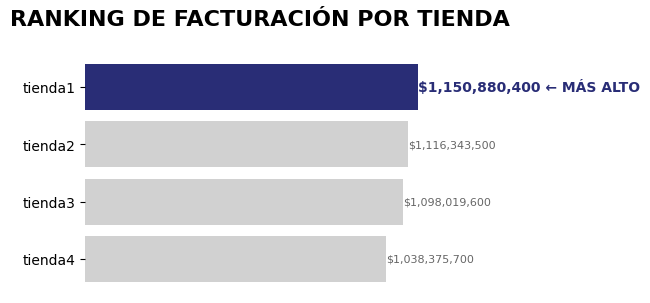

🔍 La tienda con MENOR facturación (tienda4) es la candidata a vender


In [45]:
# GRÁFICO 1: RANKING DE FACTURACIÓN CON DESTACADO
plt.figure(figsize=(5, 3))

# REUTILIZAR VARIABLE GLOBAL
facturacion_ordenada = FACTURACION_TIENDAS.sort_values(ascending=True)

# Configurar colores - destacar el MÁS ALTO aplicando Data Storytelling
colores = []
for tienda in facturacion_ordenada.index:
    if tienda == FACTURACION_TIENDAS.idxmax():
        colores.append('#292d76')  # Azul destacado
    else:
        colores.append('#d1d1d1')   # Gris para los demás

bars = plt.barh(facturacion_ordenada.index, facturacion_ordenada.values, color=colores)

plt.title('RANKING DE FACTURACIÓN POR TIENDA', fontsize=16, fontweight='bold', pad=20)

# Configuración minimalista
plt.gca().xaxis.set_visible(False)
plt.gca().yaxis.set_visible(True)
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# Valores en las barras - usar variable global para los valores
for bar in bars:
    width = bar.get_width()
    if bar.get_facecolor() == plt.cm.colors.to_rgba('#292d76'):
        plt.text(width, bar.get_y() + bar.get_height()/2,
                 f'${width:,.0f} ← MÁS ALTO',
                 ha='left', va='center', fontweight='bold', fontsize=10, color='#292d76')
    else:
        plt.text(width, bar.get_y() + bar.get_height()/2,
                 f'${width:,.0f}',
                 ha='left', va='center', fontweight='normal', fontsize=8, color='#666666')

plt.subplots_adjust(left=0.2, right=0.9, top=0.9, bottom=0.1)
plt.show()

print(f"🔍 La tienda con MENOR facturación ({FACTURACION_TIENDAS.idxmin()}) es la candidata a vender")

<Figure size 1200x500 with 0 Axes>

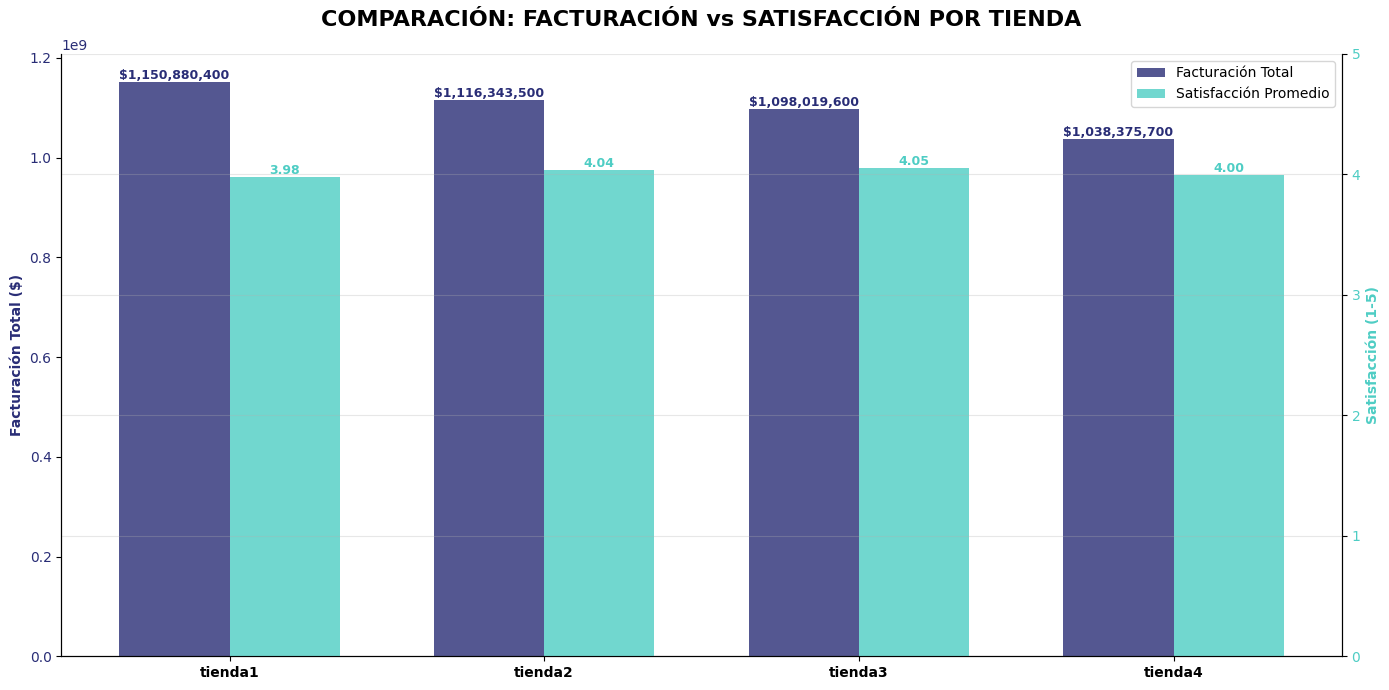


🎯 ANÁLISIS ESTRATÉGICO - FACTURACIÓN vs SATISFACCIÓN

tienda1:
  Facturación: $1,150,880,400 (ARRIBA del promedio)
  Satisfacción: 3.98/5 (ABAJO del promedio)

tienda2:
  Facturación: $1,116,343,500 (ARRIBA del promedio)
  Satisfacción: 4.04/5 (ARRIBA del promedio)
  ✅ EXCELENTE: Alto en AMBOS indicadores

tienda3:
  Facturación: $1,098,019,600 (ABAJO del promedio)
  Satisfacción: 4.05/5 (ARRIBA del promedio)

tienda4:
  Facturación: $1,038,375,700 (ABAJO del promedio)
  Satisfacción: 4.00/5 (ABAJO del promedio)
  ⚠️  ALERTA: Baja en AMBOS indicadores


In [49]:
# GRÁFICO 2: FACTURACIÓN vs SATISFACCIÓN

# REUTILIZAR VARIABLES GLOBALES
facturacion = FACTURACION_TIENDAS
calificacion = SATISFACCION_TIENDAS

# GRÁFICO OPTIMIZADO - USANDO VARIABLES GLOBALES
plt.figure(figsize=(12, 5))

tiendas_ordenadas = sorted(facturacion.index)
x = range(len(tiendas_ordenadas))
ancho = 0.35

# Crear subplot para facturación (eje izquierdo)
fig, ax1 = plt.subplots(figsize=(14, 7))

# Barras de facturación (eje izquierdo) - usar variable global
fact_values = [facturacion[tienda] for tienda in tiendas_ordenadas]
bars1 = ax1.bar([i - ancho/2 for i in x], fact_values, ancho,
                label='Facturación Total', color='#292d76', alpha=0.8)

ax1.set_xlabel('')
ax1.set_ylabel('Facturación Total ($)', fontweight='bold', color='#292d76')
ax1.tick_params(axis='y', labelcolor='#292d76')
ax1.set_xticks(x)
ax1.set_xticklabels(tiendas_ordenadas, fontweight='bold')

# Crear segundo eje para satisfacción (eje derecho)
ax2 = ax1.twinx()

# Barras de satisfacción (eje derecho) - usar variable global
calif_values = [calificacion[tienda] for tienda in tiendas_ordenadas]
bars2 = ax2.bar([i + ancho/2 for i in x], calif_values, ancho,
                label='Satisfacción Promedio', color='#4ecdc4', alpha=0.8)

ax2.set_ylabel('Satisfacción (1-5)', fontweight='bold', color='#4ecdc4')
ax2.tick_params(axis='y', labelcolor='#4ecdc4')
ax2.set_ylim(0, 5)  # Límite fijo para calificaciones

plt.title('COMPARACIÓN: FACTURACIÓN vs SATISFACCIÓN POR TIENDA', fontsize=16, fontweight='bold', pad=20)

# Valores en las barras de FACTURACIÓN
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, height,
             f'${height:,.0f}', ha='center', va='bottom',
             fontweight='bold', fontsize=9, color='#292d76')

# Valores en las barras de SATISFACCIÓN
for bar in bars2:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2, height,
             f'{height:.2f}', ha='center', va='bottom',
             fontweight='bold', fontsize=9, color='#4ecdc4')

# Combinar leyendas
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

plt.grid(axis='y', alpha=0.3)
ax1.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)

plt.tight_layout()
plt.show()

# ANÁLISIS ESTRATÉGICO
print("\n🎯 ANÁLISIS ESTRATÉGICO - FACTURACIÓN vs SATISFACCIÓN")
print("=" * 55)

# Usar variables globales para los promedios
fact_promedio = facturacion.mean()
calif_promedio = calificacion.mean()

for tienda in tiendas_ordenadas:
    fact = facturacion[tienda]
    calif = calificacion[tienda]

    print(f"\n{tienda}:")
    print(f"  Facturación: ${fact:,.0f} ({'ARRIBA' if fact > fact_promedio else 'ABAJO'} del promedio)")
    print(f"  Satisfacción: {calif:.2f}/5 ({'ARRIBA' if calif > calif_promedio else 'ABAJO'} del promedio)")

    if fact < fact_promedio and calif < calif_promedio:
        print(f"  ⚠️  ALERTA: Baja en AMBOS indicadores")
    elif fact > fact_promedio and calif > calif_promedio:
        print(f"  ✅ EXCELENTE: Alto en AMBOS indicadores")

📊 FACTURACIÓN TOTAL HISTÓRICA:
   tienda1: $1,150,880,400
   tienda2: $1,116,343,500
   tienda3: $1,098,019,600
   tienda4: $1,038,375,700


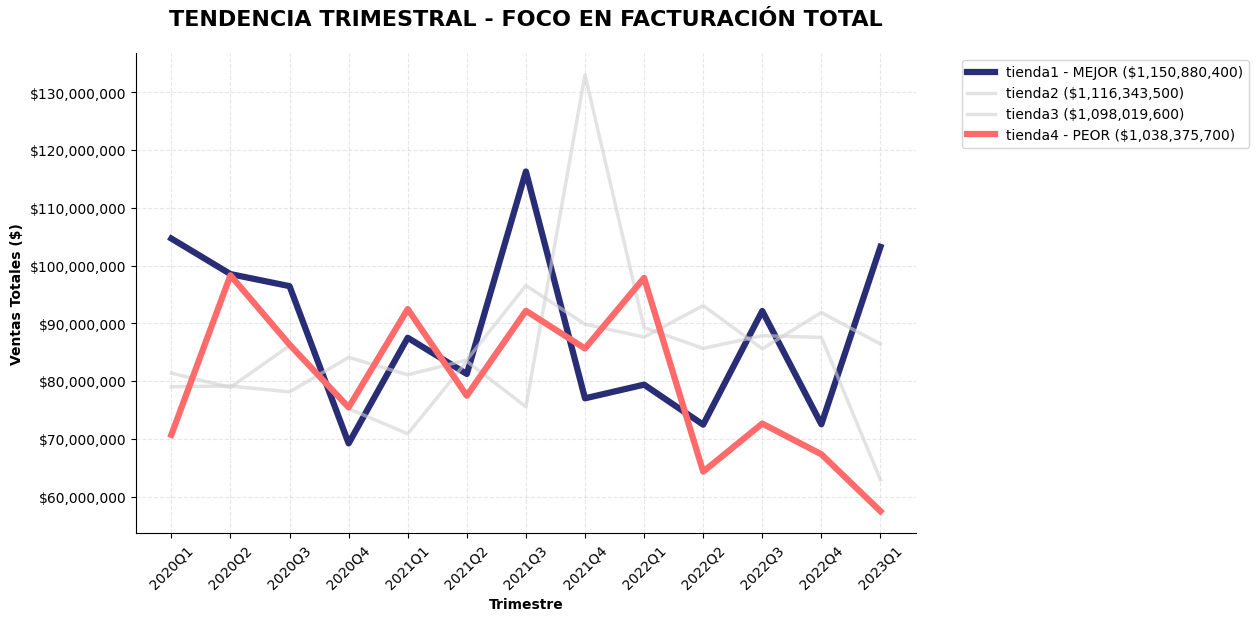

In [50]:
# VARIABLE VENTAS_TRIM_PIVOT

Consolidado_tiendas['Fecha_DateTime'] = pd.to_datetime(Consolidado_tiendas['Fecha de Compra'], dayfirst=True)
Consolidado_tiendas['Trimestre'] = Consolidado_tiendas['Fecha_DateTime'].dt.to_period('Q')
VENTAS_TRIMESTRALES = Consolidado_tiendas.groupby(['Trimestre', 'tienda'])['Precio'].sum().reset_index()
VENTAS_TRIM_PIVOT = VENTAS_TRIMESTRALES.pivot(index='Trimestre', columns='tienda', values='Precio').fillna(0)
VENTAS_TRIM_PIVOT.index = VENTAS_TRIM_PIVOT.index.astype(str)

# GRÁFICO 3: TENDENCIA TRIMESTRAL
plt.figure(figsize=(12, 6))

# REUTILIZAR VARIABLES EXISTENTES
facturacion_total = FACTURACION_TIENDAS.to_dict()
satisfaccion = SATISFACCION_TIENDAS.to_dict()
costo_envio_tienda = COSTO_ENVIO_TIENDAS.to_dict()

# Identificar MEJOR y PEOR basado en FACTURACIÓN TOTAL
mejor_tienda = FACTURACION_TIENDAS.idxmax()
peor_tienda = FACTURACION_TIENDAS.idxmin()

print("📊 FACTURACIÓN TOTAL HISTÓRICA:")
for tienda, facturacion in facturacion_total.items():
    print(f"   {tienda}: ${facturacion:,.0f}")

# Graficar cada tienda usando VENTAS_TRIM_PIVOT
for tienda in VENTAS_TRIM_PIVOT.columns:
    ventas_tienda = VENTAS_TRIM_PIVOT[tienda]

    # Asignar colores basado en FACTURACIÓN TOTAL
    if tienda == peor_tienda:
        color = '#ff6b6b'  # ROJO - PEOR facturación total
        etiqueta = f'{tienda} - PEOR (${facturacion_total[tienda]:,.0f})'
        grosor = 4.5
        alpha = 1.0
    elif tienda == mejor_tienda:
        color = '#292d76'  # AZUL - MEJOR facturación total
        etiqueta = f'{tienda} - MEJOR (${facturacion_total[tienda]:,.0f})'
        grosor = 4.5
        alpha = 1.0
    else:
        color = '#d1d1d1'  # GRIS - facturación intermedia
        etiqueta = f'{tienda} (${facturacion_total[tienda]:,.0f})'
        grosor = 2.5
        alpha = 0.6

    # Línea recta simple
    x = range(len(ventas_tienda))
    y = ventas_tienda.values
    plt.plot(x, y, linewidth=grosor, color=color, alpha=alpha, label=etiqueta)

plt.title('TENDENCIA TRIMESTRAL - FOCO EN FACTURACIÓN TOTAL', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Trimestre', fontweight='bold')
plt.ylabel('Ventas Totales ($)', fontweight='bold')
plt.xticks(range(len(VENTAS_TRIM_PIVOT.index)), VENTAS_TRIM_PIVOT.index, rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.3, linestyle='--')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))
plt.subplots_adjust(left=0.1, right=0.75, top=0.95, bottom=0.15)
plt.show()

In [35]:
# RESUMEN DEFINITIVO
print("\n🎯 DECISIÓN ESTRATÉGICA DEFINITIVA")
print("=" * 50)
print(f"🔴 VENDER: {peor_tienda}")
print(f"   • Facturación total más baja: ${facturacion_total[peor_tienda]:,.0f}")
print(f"   • Diferencia con la mejor: ${facturacion_total[mejor_tienda] - facturacion_total[peor_tienda]:,.0f}")
print(f"   • Costos de envío más bajos: ${costo_envio_tienda[peor_tienda]:,.2f}")

print(f"\n🔵 MANTENER: {mejor_tienda}")
print(f"   • Mayor facturación total: ${facturacion_total[mejor_tienda]:,.0f}")
print(f"   • Aunque tiene menor satisfacción ({satisfaccion[mejor_tienda]:.2f}/5), genera más ingresos")

print(f"\n📊 COMPARACIÓN COMPLETA:")
for tienda in FACTURACION_TIENDAS.index:
    fact = facturacion_total[tienda]
    sat = satisfaccion[tienda]
    costo = costo_envio_tienda[tienda]
    print(f"   {tienda}: ${fact:,.0f} | {sat:.2f}/5 | ${costo:,.2f} envío")


🎯 DECISIÓN ESTRATÉGICA DEFINITIVA
🔴 VENDER: tienda4
   • Facturación total más baja: $1,038,375,700
   • Diferencia con la mejor: $112,504,700
   • Costos de envío más bajos: $23,459.46

🔵 MANTENER: tienda1
   • Mayor facturación total: $1,150,880,400
   • Aunque tiene menor satisfacción (3.98/5), genera más ingresos

📊 COMPARACIÓN COMPLETA:
   tienda1: $1,150,880,400 | 3.98/5 | $26,018.61 envío
   tienda2: $1,116,343,500 | 4.04/5 | $25,216.24 envío
   tienda3: $1,098,019,600 | 4.05/5 | $24,805.68 envío
   tienda4: $1,038,375,700 | 4.00/5 | $23,459.46 envío


# ¡Extra! Análisis del desempeño geográfico

🗺️ ANÁLISIS GEOGRÁFICO DE VENTAS


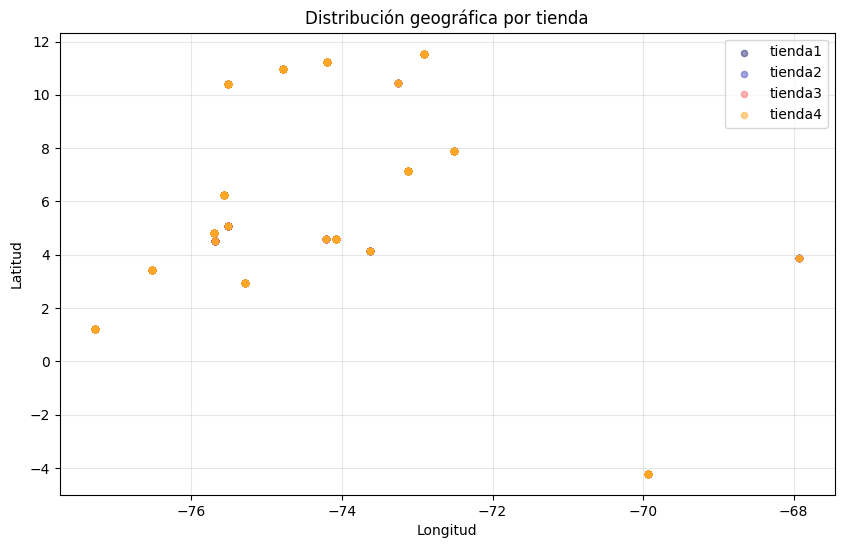

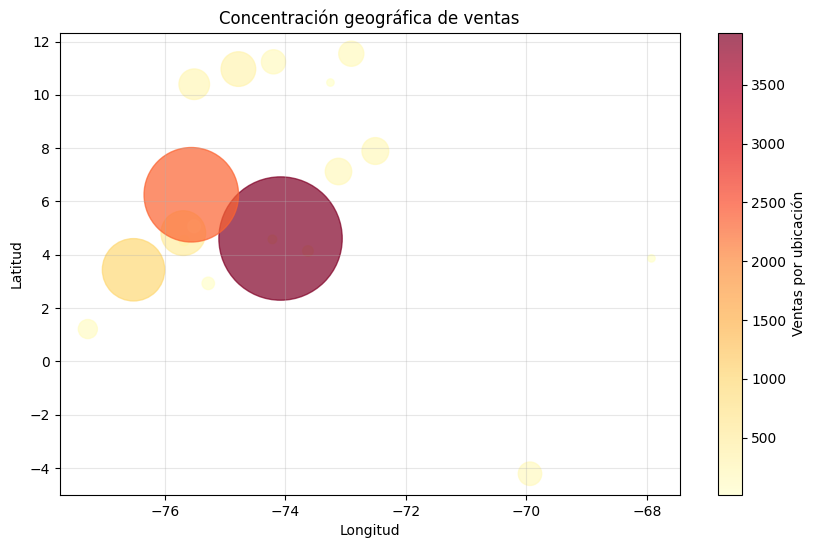


📊 FACTURACIÓN POR REGIÓN:
tienda      tienda1      tienda2      tienda3      tienda4
region                                                    
Sur      14669800.0   16159000.0   19212800.0   17108300.0
Centro  695857100.0  673175600.0  674120800.0  639420500.0
Norte   440353500.0  427008900.0  404686000.0  381846900.0


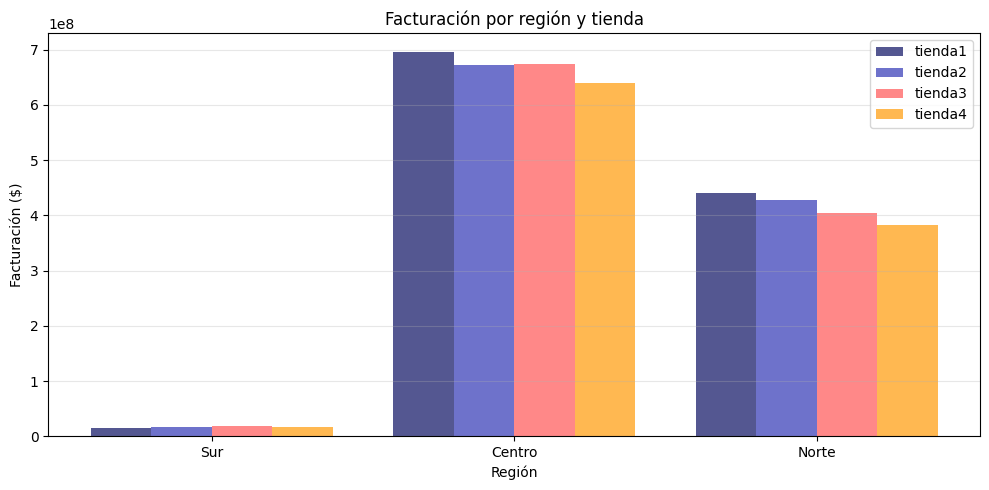

In [51]:
# =============================================================================
# ANÁLISIS GEOGRÁFICO RESUMIDO
# =============================================================================
print("🗺️ ANÁLISIS GEOGRÁFICO DE VENTAS")

# Colores para las tiendas
colores_tiendas = {
    'tienda1': '#292d76', 'tienda2': '#4a4fbf',
    'tienda3': '#ff6b6b', 'tienda4': '#ffa726'
}

# 1. GRÁFICO DE DISPERSIÓN POR TIENDA
plt.figure(figsize=(10, 6))
for tienda in Consolidado_tiendas['tienda'].unique():
    datos = Consolidado_tiendas[Consolidado_tiendas['tienda'] == tienda]
    plt.scatter(datos['lon'], datos['lat'], c=colores_tiendas[tienda],
                label=tienda, alpha=0.5, s=20)
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.title('Distribución geográfica por tienda')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# 2. MAPA DE CALOR DE CONCENTRACIÓN
plt.figure(figsize=(10, 6))
ventas_por_ubicacion = Consolidado_tiendas.groupby(['lat', 'lon']).size().reset_index(name='ventas')
plt.scatter(ventas_por_ubicacion['lon'], ventas_por_ubicacion['lat'],
           c=ventas_por_ubicacion['ventas'], s=ventas_por_ubicacion['ventas']*2,
           cmap='YlOrRd', alpha=0.7)
plt.colorbar(label='Ventas por ubicación')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.title('Concentración geográfica de ventas')
plt.grid(alpha=0.3)
plt.show()

# 3. ANÁLISIS DE RENDIMIENTO POR REGIÓN
# Crear regiones
lat_min, lat_max = Consolidado_tiendas['lat'].min(), Consolidado_tiendas['lat'].max()
lat_rango = lat_max - lat_min
limites = [lat_min, lat_min + lat_rango*0.33, lat_min + lat_rango*0.66, lat_max]
Consolidado_tiendas['region'] = pd.cut(Consolidado_tiendas['lat'], bins=limites,
                                      labels=['Sur', 'Centro', 'Norte'], include_lowest=True)

# Facturación por región y tienda
region_facturacion = Consolidado_tiendas.groupby(['region', 'tienda'], observed=True)['Precio'].sum().unstack()

print("\n📊 FACTURACIÓN POR REGIÓN:")
print(region_facturacion)

# 4. GRÁFICO DE COMPARACIÓN REGOINAL
plt.figure(figsize=(10, 5))
regiones = region_facturacion.index
x = range(len(regiones))
ancho = 0.2

for i, tienda in enumerate(region_facturacion.columns):
    valores = [region_facturacion.loc[region, tienda] for region in regiones]
    plt.bar([pos + i*ancho for pos in x], valores, ancho, label=tienda,
            color=colores_tiendas[tienda], alpha=0.8)

plt.xlabel('Región')
plt.ylabel('Facturación ($)')
plt.title('Facturación por región y tienda')
plt.xticks([pos + ancho*1.5 for pos in x], regiones)
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# 7. Informe final - Análisis Alura Store




## Recomendación estratégica

### 📋 INTRODUCCIÓN
El presente informe tiene como objetivo analizar el desempeño de las cuatro tiendas del Sr. Juan (tienda1, tienda2, tienda3 y tienda4) para identificar cuál presenta el menor rendimiento y, por lo tanto, representa la mejor candidata para ser vendida. El análisis se basa en cinco criterios clave:

*   Facturación total
*   Categorías de productos
*   Satisfacción del cliente
*   Productos más/menos vendidos
*   Costos de envío


### 📊 ANÁLISIS COMPARATIVO

**1. FACTURACIÓN TOTAL POR TIENDA**

* tienda1: 1,150,880,400
* tienda2: 1,116,343,500
* tienda3: 1,098,019,600
* tienda4: 1,038,375,700

🔍 Insight: tienda4 presenta la menor facturación total, con $112 millones menos que tienda1.

**2. SATISFACCIÓN DEL CLIENTE**
* tienda3: 4.05/5
* tienda2: 4.04/5
* tienda4: 4.00/5
* tienda1: 3.98/5

🔍 Insight: tienda4 mantiene una satisfacción media (4.00/5), no siendo la peor evaluada.

**3. COSTOS DE ENVÍO**
* tienda1: 26,018.61
* tienda2: 25,216.24
* tienda3: 24,805.68
* tienda4: 23,459.46

🔍 Insight: tienda4 tiene los costos de envío más bajos, representando una ventaja operativa.

**4. ESPECIALIZACIÓN POR CATEGORÍAS**
* tienda1: Muebles
* tienda2: Muebles
* tienda3: Muebles
* tienda4: Muebles

🔍 Insight: Todas las tiendas se especializan en Muebles, sin ventajas competitivas distintivas.


### 📈 ANÁLISIS VISUAL INTEGRADO

Los gráficos generados confirman consistentemente el bajo desempeño de tienda4:

* Gráfico 1 - Ranking de facturación: Muestra claramente a tienda4 en última posición

* Gráfico 2 - Facturación vs Satisfacción: Revela que tienda4 combina baja facturación con satisfacción media

* Gráfico 3 - Tendencias trimestrales: Confirma el desempeño consistentemente inferior de tienda4

### 🎯 RECOMENDACIÓN FINAL

**DECISIÓN:** VENDER tienda4

**Justificación Detallada:**

💰 Menor Potencial de Ingresos

* Facturación más baja (1,038M vs 1,150M de tienda1)
* Diferencia de $112 millones con la mejor tienda
* Menor contribución al negocio general

📊 Desempeño Consistentemente Inferior

* Última posición en facturación histórica
* Sin ventajas competitivas distintivas
* Especialización idéntica a las demás tiendas

⚖️ Relación Costo-Beneficio Favorable

* Aunque tiene costos de envío más bajos, esto no compensa la baja facturación
* Satisfacción media (4.00/5) que no justifica mantenerla

🔄 Impacto Estratégico Mínimo

* La venta no afectaría la especialización del negocio
* Recursos pueden reasignarse a tiendas con mejor desempeño
* Menor riesgo operativo

### 💡 RECOMENDACIONES ADICIONALES

* Reinvertir recursos de tienda4 en tienda1 (mayor facturación)
* Monitorear tendencias de tienda3 (mejor satisfacción pero facturación media)
* Mantener diversificación actual entre las tres tiendas restantes
* Evaluar expansión en categorías donde tienda4 tenía menor participación


### ✅ CONCLUSIÓN
Basado en el análisis integral de los cinco criterios establecidos, tienda4 emerge como la candidata clara para la venta. Su bajo desempeño en facturación, combinado con la ausencia de ventajas competitivas distintivas, justifica esta decisión estratégica. La venta permitirá al Sr. Juan optimizar sus recursos y enfocarse en las tiendas con mayor potencial de crecimiento.

La recomendación está respaldada por datos concretos y análisis realizado, asegurando una decisión objetiva y fundamentada.